## Data Understanding

### Data Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

### Load Data

In [2]:
missing_value_formats = ["n.a.","?","NA","NaN","n/a", "na", "--"," "]
HRA= pd.read_csv('aug_train.csv',na_values=missing_value_formats)


### Renamed data columns

In [3]:
train_data = HRA.rename(
columns={'enrollee_id':'Draftee_ID',
        'city':'City_Code',
        'city_development_index':'City_Dev_Index',
        'gender':'Gender',
        'relevent_experience':'Relevent_Experience',
        'enrolled_university':'Drafteed_University',
        'education_level':'Education_Level',
        'major_discipline':'Major_Discipline',
        'experience':'Experience_Year',
        'company_size':'Agency_Size',
        'company_type':'Agency_Type',
        'last_new_job':'Pre_Employment_Duration',
        'training_hours':'Training_Hours',})

### Exploratory Analysis

In [4]:
train_data.head(10)

,Draftee_ID,City_Code,City_Dev_Index,Gender,Relevent_Experience,Drafteed_University,Education_Level,Major_Discipline,Experience_Year,Agency_Size,Agency_Type,Pre_Employment_Duration,Training_Hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [5]:
train_data.describe()

,Draftee_ID,City_Dev_Index,Training_Hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Draftee_ID               19158 non-null  int64  
 1   City_Code                19158 non-null  object 
 2   City_Dev_Index           19158 non-null  float64
 3   Gender                   14650 non-null  object 
 4   Relevent_Experience      19158 non-null  object 
 5   Drafteed_University      18772 non-null  object 
 6   Education_Level          18698 non-null  object 
 7   Major_Discipline         16345 non-null  object 
 8   Experience_Year          19093 non-null  object 
 9   Agency_Size              13220 non-null  object 
 10  Agency_Type              13018 non-null  object 
 11  Pre_Employment_Duration  18735 non-null  object 
 12  Training_Hours           19158 non-null  int64  
 13  target                   19158 non-null  float64
dtypes: float64(2), int64(2

In [7]:
print('Total missing value in dataset:\n', train_data.isna().sum())

Total missing value in dataset:
 Draftee_ID                    0
City_Code                     0
City_Dev_Index                0
Gender                     4508
Relevent_Experience           0
Drafteed_University         386
Education_Level             460
Major_Discipline           2813
Experience_Year              65
Agency_Size                5938
Agency_Type                6140
Pre_Employment_Duration     423
Training_Hours                0
target                        0
dtype: int64


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


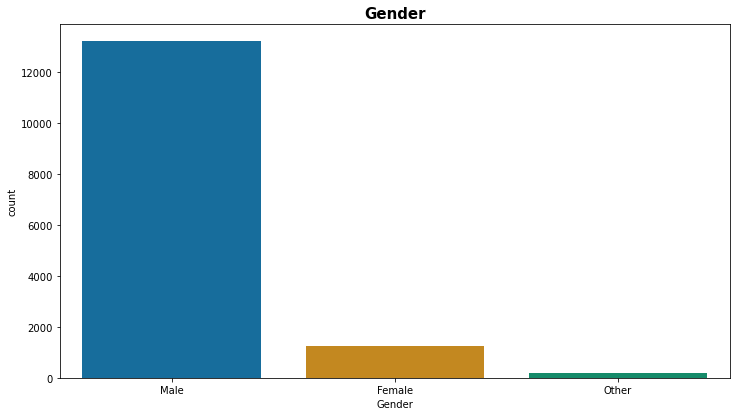

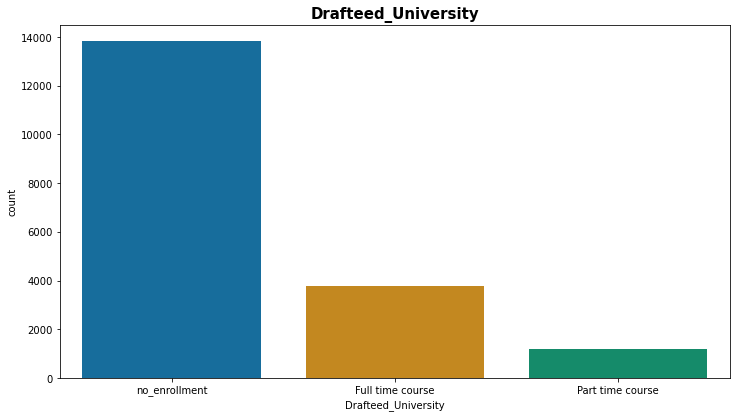

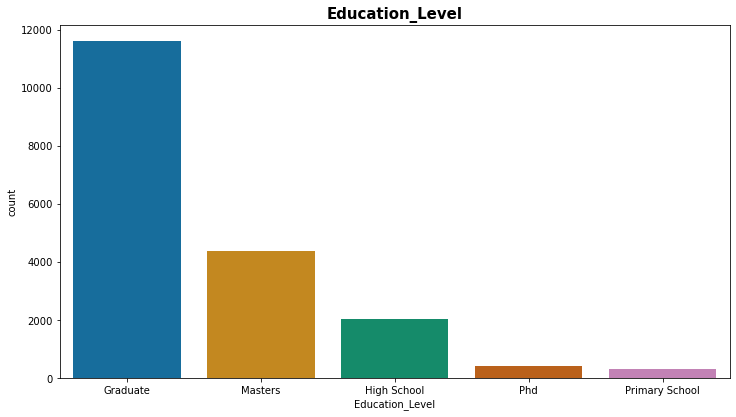

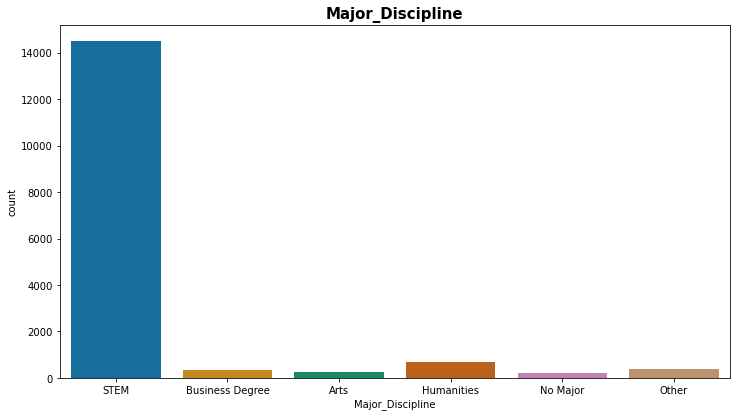

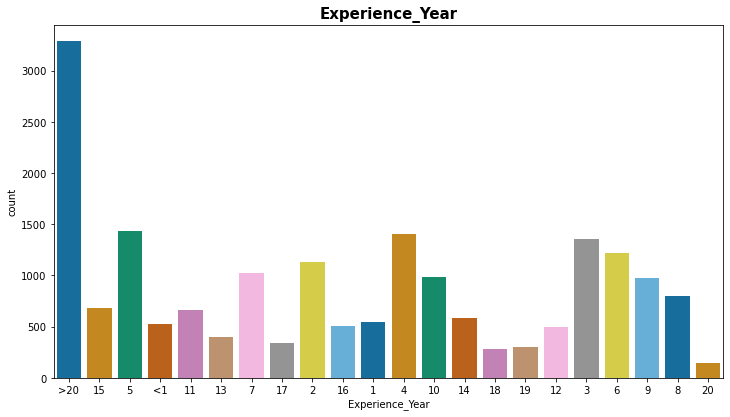

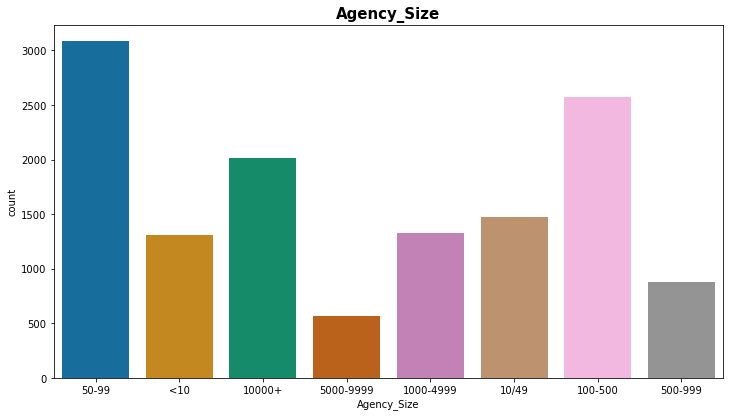

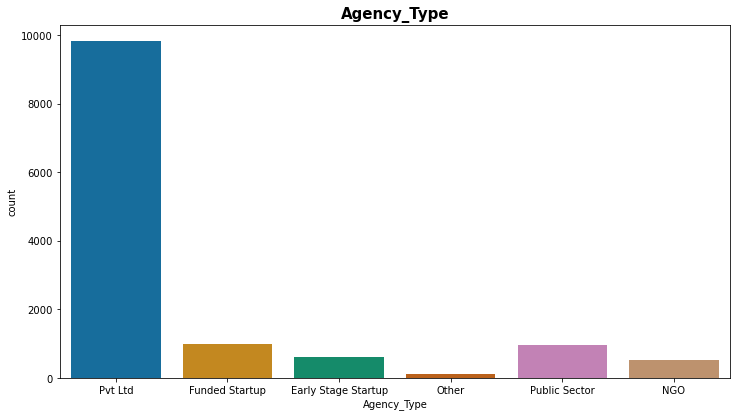

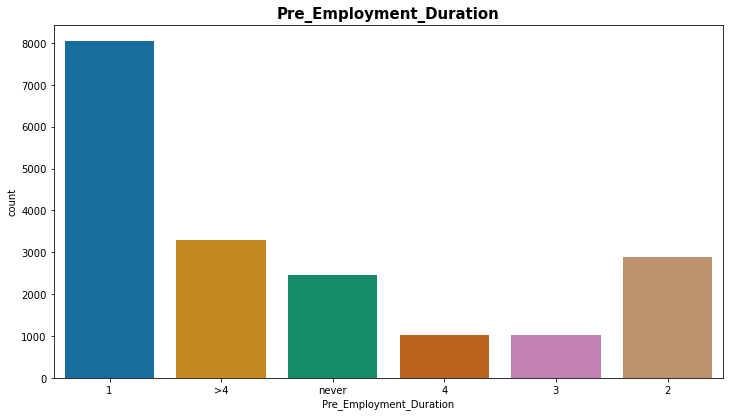

In [8]:

cols_with_nan_data = train_data[['Gender', 'Drafteed_University', 'Education_Level', 'Major_Discipline', 'Experience_Year', 'Agency_Size', 'Agency_Type', 'Pre_Employment_Duration']]   
colorblind_palette = sns.color_palette("colorblind")

for i in cols_with_nan_data:
    plt.figure(figsize=(12,6.5)) 
    plt.title(i, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    sns.countplot(data = train_data[i], x = cols_with_nan_data[i], palette=colorblind_palette)
    plt.show()


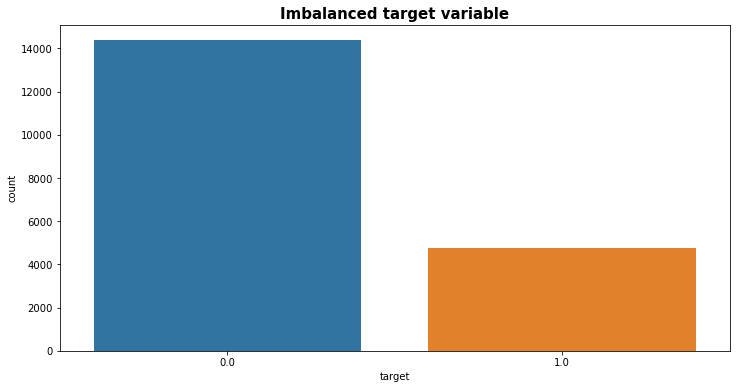

In [9]:
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x='target', data=train_data)

### Data cleaning

In [10]:
data=train_data
data.shape

(19158, 14)

In [11]:
data['City_Code'] = data['City_Code'].str.split("_",expand=True)[1].astype('int64')
data['Gender'] = data['Gender'].replace(np.nan, 'Male')
data['Drafteed_University'] = data['Drafteed_University'].replace(np.nan, 'no_enrollment')
data['Education_Level'] = data['Education_Level'].replace(np.nan,'Graduate')
data['Major_Discipline'] = data['Major_Discipline'].replace(np.nan,'STEM')
data['Experience_Year'] = data['Experience_Year'].replace(np.nan,'>20')
data['Agency_Size'] = data['Agency_Size'].replace(np.nan,'50-99')
data['Agency_Type'] = data['Agency_Type'].replace(np.nan,'Pvt Ltd')
data['Pre_Employment_Duration'] = data['Pre_Employment_Duration'].replace(np.nan,'1')

In [12]:
data = data[data.Gender != 'Other']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18967 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Draftee_ID               18967 non-null  int64  
 1   City_Code                18967 non-null  int64  
 2   City_Dev_Index           18967 non-null  float64
 3   Gender                   18967 non-null  object 
 4   Relevent_Experience      18967 non-null  object 
 5   Drafteed_University      18967 non-null  object 
 6   Education_Level          18967 non-null  object 
 7   Major_Discipline         18967 non-null  object 
 8   Experience_Year          18967 non-null  object 
 9   Agency_Size              18967 non-null  object 
 10  Agency_Type              18967 non-null  object 
 11  Pre_Employment_Duration  18967 non-null  object 
 12  Training_Hours           18967 non-null  int64  
 13  target                   18967 non-null  float64
dtypes: float64(2), int64(3

In [14]:
ordinal_atributes = ['Education_Level', 'Experience_Year', 'Agency_Size', 'Pre_Employment_Duration']

cardinal_atributes = ['Gender', 'Relevent_Experience', 'Drafteed_University', 'Major_Discipline', 'Agency_Type']

for i in ordinal_atributes:
    print(np.unique(data[i]))
    
for i in cardinal_atributes:
    print(np.unique(data[i]))

['Graduate' 'High School' 'Masters' 'Phd' 'Primary School']
['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '3' '4'
 '5' '6' '7' '8' '9' '<1' '>20']
['10/49' '100-500' '1000-4999' '10000+' '50-99' '500-999' '5000-9999'
 '<10']
['1' '2' '3' '4' '>4' 'never']
['Female' 'Male']
['Has relevent experience' 'No relevent experience']
['Full time course' 'Part time course' 'no_enrollment']
['Arts' 'Business Degree' 'Humanities' 'No Major' 'Other' 'STEM']
['Early Stage Startup' 'Funded Startup' 'NGO' 'Other' 'Public Sector'
 'Pvt Ltd']


In [15]:
pd.options.mode.chained_assignment = None
ordinal_pipeline = Pipeline([
    ('OrdinalEncoder',OrdinalEncoder(categories=[
                                    ['Unknown', 'Primary School',  'High School', 'Graduate', 'Masters', 'Phd'],
                                    'Unknown,<1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,>20'.split(','),
                                    ['Unknown','<10', '10/49', '50-99', '100-500', '500-999' ,'1000-4999', '5000-9999', '10000+'],
                                    ['Unknown','1', '2', '3', '4', '>4', 'never']
                                ]))
])

ordinal_pipeline.fit(data[ordinal_atributes])
data[ordinal_atributes] = ordinal_pipeline.transform(data[ordinal_atributes])

##


In [16]:
data.head(20)

,Draftee_ID,City_Code,City_Dev_Index,Gender,Relevent_Experience,Drafteed_University,Education_Level,Major_Discipline,Experience_Year,Agency_Size,Agency_Type,Pre_Employment_Duration,Training_Hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,3.0,STEM,22.0,3.0,Pvt Ltd,1.0,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,3.0,STEM,16.0,3.0,Pvt Ltd,5.0,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,3.0,STEM,6.0,3.0,Pvt Ltd,6.0,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,3.0,Business Degree,1.0,3.0,Pvt Ltd,6.0,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,4.0,STEM,22.0,3.0,Funded Startup,4.0,8,0.0
5,21651,176,0.764,Male,Has relevent experience,Part time course,3.0,STEM,12.0,3.0,Pvt Ltd,1.0,24,1.0
6,28806,160,0.920,Male,Has relevent experience,no_enrollment,2.0,STEM,6.0,3.0,Funded Startup,1.0,24,0.0
7,402,46,0.762,Male,Has relevent experience,no_enrollment,3.0,STEM,14.0,1.0,Pvt Ltd,5.0,18,1.0
8,27107,103,0.920,Male,Has relevent experience,no_enrollment,3.0,STEM,8.0,3.0,Pvt Ltd,1.0,46,1.0
9,699,103,0.920,Male,Has relevent experience,no_enrollment,3.0,STEM,18.0,8.0,Pvt Ltd,5.0,123,0.0


<AxesSubplot:>

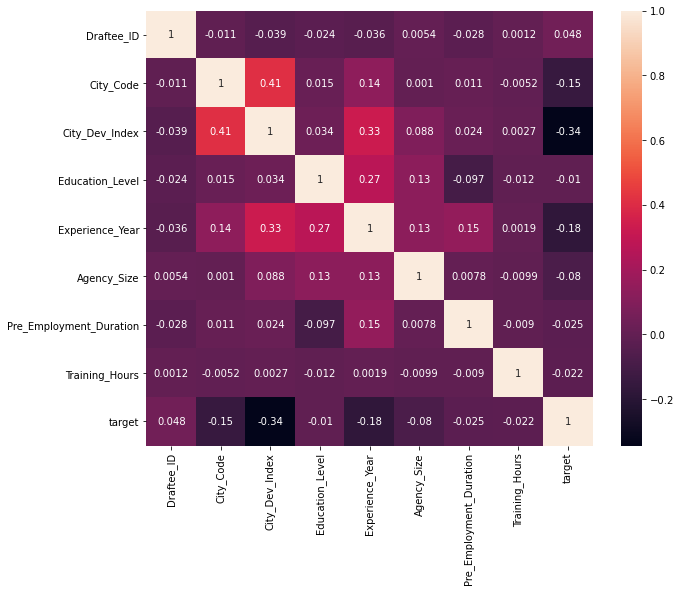

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, color='b')

In [20]:
data = pd.get_dummies(data, columns=cardinal_atributes)